<h1>Association Rule Mining</h1>

 Association Rule Mining is a data mining technique used to discover interesting relationships or patterns (i.e., associations, correlations) among a set of items in large datasets. It is commonly used in market basket analysis to find items that frequently occur together in transactions.
 Association Rule Mining falls under the category of unsupervised learning because it does not rely on predefined labels or correct outputs

<h1>Apriori</h1>

The Apriori Algorithm is a classic association rule mining technique used to extract frequent itemsets and generate association rules from large datasets, typically transactional data.

🔁 Step-by-Step Process of Association Rule Mining:

Step 1: Data Collection
- Start with a dataset of transactions.
- Each transaction is a list of items bought together.

Example:
T1: {Milk, Bread, Butter}  
T2: {Bread, Butter}  
T3: {Milk, Bread}  

Step 2: Generate Frequent Itemsets
- Use algorithms like Apriori or FP-Growth to find item combinations (itemsets) that appear frequently in the dataset.
- This is based on a minimum support threshold (e.g., itemsets must appear in at least 30% of transactions).
- Support = (Number of transactions containing the itemset) / (Total transactions)

Step 3: Create Candidate Rules
- From the frequent itemsets, generate possible association rules.

Step 4: Calculate Rule Metrics

Step 5: Filter Strong Rules
- Use thresholds to select strong rules:
- Minimum confidence (e.g., ≥ 70%)
- Minimum lift (e.g., > 1 means a positive association)

Step 6: Interpret the Rules
- Analyze the strong rules to gain insights.

Example:

makefile
Copy code
Rule: {Bread} → {Butter}  
Confidence: 0.85  
Lift: 1.4  
=> Customers who buy bread are likely to buy butter.

<h1>✅ Summary Flow:</h1>

Transaction Data
      ↓ 
      
Frequent Itemsets (with Apriori / FP-Growth)
      ↓ 
      
Generate Association Rules
      ↓
        
Calculate Support, Confidence, Lift
      ↓
       
Filter Strong Rules
      ↓
       
Business Insights


In [17]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ----------------------- ---------------- 0.8/1.4 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 5.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 1: Define the transactions
transactions = [
    ['Milk', 'Egg', 'Bread', 'Butter'],
    ['Milk', 'Butter', 'Egg', 'Ketchup'],
    ['Bread', 'Butter', 'Ketchup'],
    ['Milk', 'Bread', 'Butter'],
    ['Bread', 'Butter', 'Cookies'],
    ['Milk', 'Bread', 'Butter', 'Cookies'],
    ['Milk', 'Cookies'],
    ['Milk', 'Bread', 'Butter'],
    ['Bread', 'Butter', 'Egg', 'Cookies'],
    ['Milk', 'Butter', 'Bread'],
    ['Milk', 'Bread', 'Butter'],
    ['Milk', 'Bread', 'Cookies', 'Ketchup']
]

# Step 2: Encode the transactions
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)

df

,Bread,Butter,Cookies,Egg,Ketchup,Milk
0,True,True,False,True,False,True
1,False,True,False,True,True,True
2,True,True,False,False,True,False
3,True,True,False,False,False,True
4,True,True,True,False,False,False
5,True,True,True,False,False,True
6,False,False,True,False,False,True
7,True,True,False,False,False,True
8,True,True,True,True,False,False
9,True,True,False,False,False,True


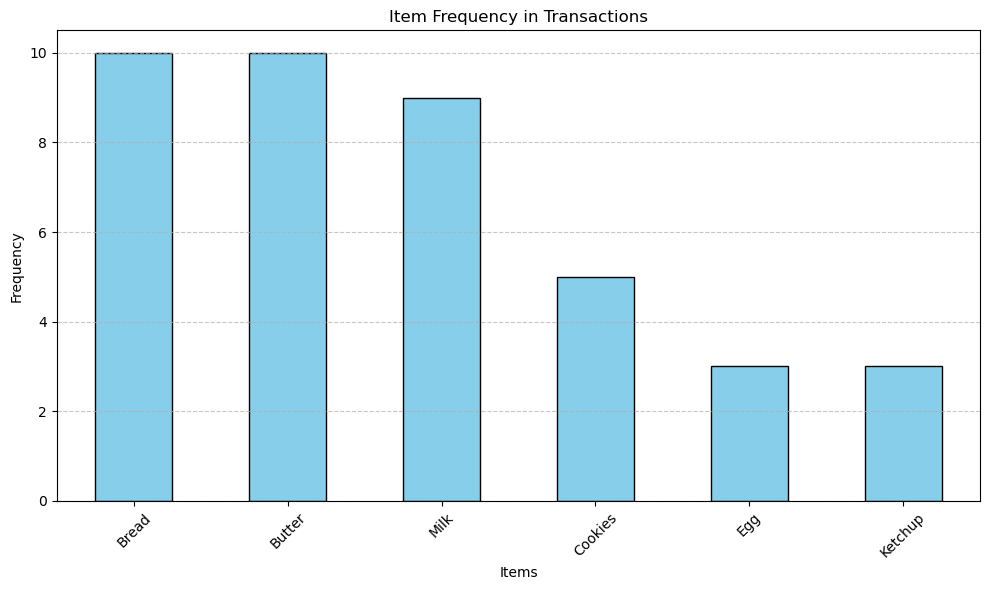

In [29]:
import matplotlib.pyplot as plt

# Step 3: Sum up item appearances (True = 1, False = 0)
item_counts = df.sum().sort_values(ascending=False)

# Step 4: Plotting
plt.figure(figsize=(10, 6))
item_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Item Frequency in Transactions')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From the above bar plot:

Butter appears in nearly all transactions — indicating it's a staple item or a common co-purchase item.

Bread also appears very frequently, suggesting it is commonly bought with other items like Butter and Milk.

Milk is present in a majority of the transactions, showing it is another frequently purchased item.

Cookies, Egg, and Ketchup are more occasional purchases, and may not be in every basket.

In [32]:
# Step 3: Generate frequent itemsets (min_support = 0.33)
frequent_itemsets = apriori(df, min_support=0.33, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.833333,(Bread)
1,0.833333,(Butter)
2,0.416667,(Cookies)
3,0.750000,(Milk)
4,0.750000,"(Bread, Butter)"
5,0.333333,"(Bread, Cookies)"
6,0.583333,"(Bread, Milk)"
7,0.583333,"(Butter, Milk)"
8,0.500000,"(Bread, Milk, Butter)"


In [34]:
# Generating the association rules with confidence of >=0.5
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

print("Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Association Rules:
        antecedents      consequents   support  confidence      lift
0           (Bread)         (Butter)  0.750000    0.900000  1.080000
1          (Butter)          (Bread)  0.750000    0.900000  1.080000
2         (Cookies)          (Bread)  0.333333    0.800000  0.960000
3           (Bread)           (Milk)  0.583333    0.700000  0.933333
4            (Milk)          (Bread)  0.583333    0.777778  0.933333
5          (Butter)           (Milk)  0.583333    0.700000  0.933333
6            (Milk)         (Butter)  0.583333    0.777778  0.933333
7     (Bread, Milk)         (Butter)  0.500000    0.857143  1.028571
8   (Bread, Butter)           (Milk)  0.500000    0.666667  0.888889
9    (Butter, Milk)          (Bread)  0.500000    0.857143  1.028571
10          (Bread)   (Butter, Milk)  0.500000    0.600000  1.028571
11           (Milk)  (Bread, Butter)  0.500000    0.666667  0.888889
12         (Butter)    (Bread, Milk)  0.500000    0.600000  1.028571


By performing Apriori-based association rule mining, we extracted valuable insights into how items are frequently bought together. Frequent Itemsets (min_support = 0.33)

- Milk & Butter appear together frequently, indicating they are commonly purchased as a pair.
- Bread & Butter also have high support, suggesting that consumers prefer them together.
- Cookies & Milk show up frequently, reinforcing the idea that they are often consumed together.
Association Rules (min_confidence = 0.5) Examples of rules generated:
- {Milk} → {Butter} (strong confidence): If a customer buys Milk, they are highly likely to - buy Butter.
- {Bread, Butter} → {Milk}: People who buy Bread & Butter often buy Milk too.
- {Cookies} → {Milk}: A strong indicator that Cookies are frequently paired with Milk.

<h1>ECLAT (Equivalence Class Clustering and bottom-up Lattice Traversal).</h1>

ECLAT stands for Equivalence Class Clustering and bottom-up Lattice Traversal.
It is a fast and memory-efficient algorithm used to find frequent itemsets in large transactional datasets.

Unlike Apriori, which uses a horizontal layout (list of transactions), ECLAT uses a vertical data format where each item is linked to the list of transaction IDs (TIDs) it appears in.
It then finds frequent itemsets by intersecting TID sets.

🔸 Step-by-Step Working of ECLAT:

1. Convert data to vertical format
2. Start with frequent 1-itemsets
3. Generate k-itemsets by intersecting TID sets
4. Keep itemsets that meet minimum support
5. Repeat recursively:Expand itemsets and intersect TID sets until no frequent itemsets remain.
6. (Optional) Generate Association Rules)


In [39]:
import pandas as pd
from itertools import combinations

In [43]:
# Step 1: Prepare the dataset (from the image)
data = {
    'Bread':   [1,0,0,1,1,0,1,1,1],
    'Butter':  [1,1,1,1,0,1,0,1,1],
    'Milk':    [0,0,1,0,1,1,0,1,1],
    'Coke':    [0,1,0,1,1,1,1,1,0],
    'Jam':     [1,0,0,0,0,0,0,1,0]
}
df = pd.DataFrame(data, index=[f"T{i+1}" for i in range(9)])
df

,Bread,Butter,Milk,Coke,Jam
T1,1,1,0,0,1
T2,0,1,0,1,0
T3,0,1,1,0,0
T4,1,1,0,1,0
T5,1,0,1,1,0
T6,0,1,1,1,0
T7,1,0,0,1,0
T8,1,1,1,1,1
T9,1,1,1,0,0


In [49]:
# Step 2: Convert to vertical format (item → list of transaction IDs)
vertical_data = {}
for item in df.columns:
    vertical_data[item] = set(df[df[item] == 1].index)

# Step 3: Define minimum support threshold (33% of 9 = 3 transactions)
min_support = 2

# Step 4: Generate frequent itemsets
def eclat(prefix, items, min_support, frequent_itemsets):
    for i in range(len(items)):
        item, tid_set = items[i]
        new_prefix = prefix + [item]
        support = len(tid_set)
        if support >= min_support:
            frequent_itemsets.append((new_prefix, support))
            remaining_items = []
            for j in range(i+1, len(items)):
                item_j, tid_set_j = items[j]
                intersection = tid_set & tid_set_j
                if len(intersection) >= min_support:
                    remaining_items.append((item_j, intersection))
            if remaining_items:
                eclat(new_prefix, remaining_items, min_support, frequent_itemsets)

# Step 5: Run the algorithm
initial_items = list(vertical_data.items())
frequent_itemsets = []
eclat([], initial_items, min_support, frequent_itemsets)

# Step 6: Display results
print("📌 Frequent Itemsets using ECLAT (support ≥ 3):")
for itemset, support in frequent_itemsets:
    print(f"Items: {itemset}, Support: {support}")


📌 Frequent Itemsets using ECLAT (support ≥ 3):
Items: ['Bread'], Support: 6
Items: ['Bread', 'Butter'], Support: 4
Items: ['Bread', 'Butter', 'Milk'], Support: 2
Items: ['Bread', 'Butter', 'Coke'], Support: 2
Items: ['Bread', 'Butter', 'Jam'], Support: 2
Items: ['Bread', 'Milk'], Support: 3
Items: ['Bread', 'Milk', 'Coke'], Support: 2
Items: ['Bread', 'Coke'], Support: 4
Items: ['Bread', 'Jam'], Support: 2
Items: ['Butter'], Support: 7
Items: ['Butter', 'Milk'], Support: 4
Items: ['Butter', 'Milk', 'Coke'], Support: 2
Items: ['Butter', 'Coke'], Support: 4
Items: ['Butter', 'Jam'], Support: 2
Items: ['Milk'], Support: 5
Items: ['Milk', 'Coke'], Support: 3
Items: ['Coke'], Support: 6
Items: ['Jam'], Support: 2
